# **Product Image Web Scrape**

Extraction of the source images would be performed using Selenium, a web browser automation tool using the Chrome WebDriver. The e-commerce site for pooling enough image volumes would be on Amazon.com. The product categories will respectively be: 

*  T-shirts from the clothing section
*  Watches from the accessories section
*  Footwear from the shoes section
*  Backpacks from the luggage section

5,000 images will be extracted from each product class for a total of 20,000 images.



**Import Libraries**

In [14]:
from bs4 import BeautifulSoup as soup
from selenium import webdriver
from PIL import Image
import random
import os
import cv2
import time
import matplotlib.pyplot as plt

**Source URLs & Directory Folders for Image Scrape**

In [ ]:
# Watches
watch_url = 'https://www.amazon.com/s?i=specialty-aps&bbn=16225019011&rh=n%3A7141123011%2Cn%3A16225019011%2Cn%3A6358539011&pf_rd_i=16225019011&pf_rd_m=ATVPDKIKX0DER&pf_rd_p=5cd8272b-5ce4-4c26-bfcb-d6dca0c1e427&pf_rd_p=5cd8272b-5ce4-4c26-bfcb-d6dca0c1e427&pf_rd_r=CX53J0NV7EFDPJSMDE9S&pf_rd_r=CX53J0NV7EFDPJSMDE9S&pf_rd_s=merchandised-search-left-2&pf_rd_t=101&ref=AE_Men_Watches'
watch_dir = '..Assets/Watch_Images/'

# Shirts
shirt_url = "https://www.amazon.com/s?i=fashion-mens-intl-ship&bbn=16225019011&rh=n%3A16225019011%2Cn%3A1040658%2Cn%3A2476517011&dc&pf_rd_i=16225019011&pf_rd_m=ATVPDKIKX0DER&pf_rd_p=554625a3-8de1-4fdc-8877-99874d353388&pf_rd_r=SK809FT75R844KJ5WXGY&pf_rd_s=merchandised-search-4&pf_rd_t=101&qid=1594157542&rnid=1040658&ref=sr_nr_n_1"
shirt_dir = '..Assets/Shirt_Images/'

# Footwear
footwear_url = "https://www.amazon.com/s?i=specialty-aps&bbn=16225019011&rh=n%3A7141123011%2Cn%3A16225019011%2Cn%3A679255011&pf_rd_i=16225019011&pf_rd_m=ATVPDKIKX0DER&pf_rd_p=5cd8272b-5ce4-4c26-bfcb-d6dca0c1e427&pf_rd_p=5cd8272b-5ce4-4c26-bfcb-d6dca0c1e427&pf_rd_r=V3G56PM79KZ6R1KBGHTK&pf_rd_r=V3G56PM79KZ6R1KBGHTK&pf_rd_s=merchandised-search-left-2&pf_rd_t=101&ref=AE_Men_Shoes"
footwear_dir = '..Assets/Footwear_Images/'

#Backpacks
backpack_url ='https://www.amazon.com/s?i=luggage-intl-ship&bbn=16225017011&rh=n%3A16225017011%2Cn%3A360832011&dc&pf_rd_i=16225017011&pf_rd_m=ATVPDKIKX0DER&pf_rd_p=92f6b9f6-45a8-4a56-916b-6d695966ee4a&pf_rd_p=92f6b9f6-45a8-4a56-916b-6d695966ee4a&pf_rd_r=VY9TCFJG5E3ZBF2XHZY9&pf_rd_r=VY9TCFJG5E3ZBF2XHZY9&pf_rd_s=merchandised-search-left-2&pf_rd_t=101&qid=1595762020&ref=sr_ex_n_1'
backpack_dir = '..Assets/Backpack_Images/'

**Construct a general function to perform the web scrape (based on 5,000 image pull per category)**

In [ ]:
def amazon_scrape(url, directory):

  image_num = 0
  row = 1
  page_response = driver.get(url)
  page_content = soup(driver.page_source, 'html.parser')
  images = page_content.findAll("img",{"class":"s-image"})
  image_num += len(images)
  for i in range(len(images)):
    f = open(directory+str((row-1)*(len(images))+i)+".jpg",'wb')
    f.write(requests.get(images[i]['src']).content)
    f.close

  while(1):

    row += 1
    if(page_content.find("li",{'class':'a-last'}) != None):
      driver.find_element_by_xpath("//li[contains(@class, 'a-last')]/a").click()
      time.sleep(3)
      page_content = soup(driver.page_source, 'html.parser')
      images = page_content.findAll("img",{"class":"s-image"})
      image_num += len(images)

      for i in range(len(images)):
        f = open(directory+str((row-1)*(len(images))+i)+".jpg",'wb')
        f.write(requests.get(images[i]['src']).content)
        f.close
        
      if(image_num > 5000): break

**Extract Images from the 3 respective product categories**

Selenium run on chromedriver will be used to extract the images. Since there are 5,000 images per category, each pull will be done in a separate operation rather than a combined loop just in a case disruptions appear.

In [ ]:
# Launch the chrome selenium webdriver
driver = webdriver.Chrome("chromedriver")

In [ ]:
# Extract Images from the Amazon Category of Watches
amazon_scrape(watch_url,watch_dir)

# Extract Images from the Amazon Category of T-shirts
amazon_scrape(shirt_url,shirt_dir)

# Extract Images from the Amazon Category of Footwear
amazon_scrape(footwear_url, footwear_dir)

# Extract Images from the Amazon Category of Backpacks
amazon_scrape(backpack_url, backpack_dir)

**Sample check of downloaded images**

In [9]:
path = "../Assets" 

image_sample = []
types = ["Shirt_Images", "Footwear_Images", "Watch_Images","Backpack_Images"]

for i in types:
    for j in os.listdir(path + i):
        image = cv2.imread(path + i + '/' + j)
        image_sample.append(image)

In [20]:
random.shuffle(image_sample)

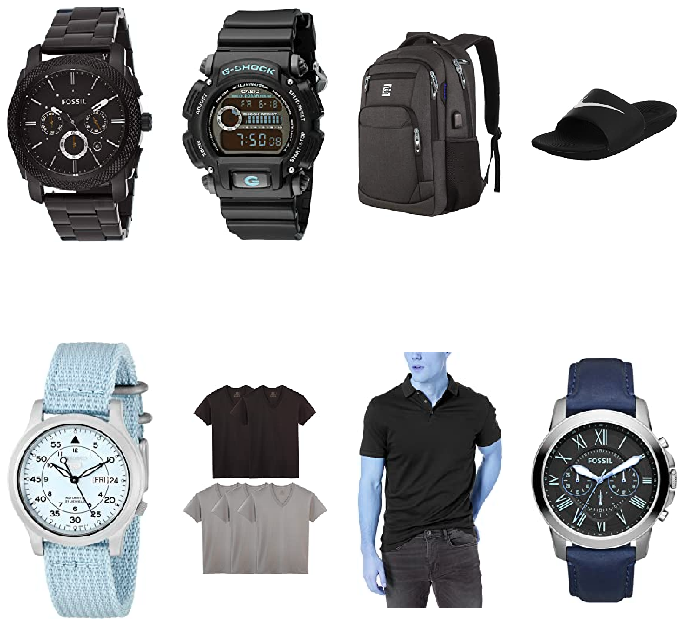

In [21]:
fig=plt.figure(figsize=(12, 12))
for i in range(1, 9):
    fig.add_subplot(2, 4, i)
    plt.imshow(image_sample[i])
    plt.axis('off') 
plt.show()

All products images have been accounted for before pre-processing.